# Cars K-Means Clustering

About the dataset :
Dataset has 8 parameters, check description of each parameter below:-

1.mpg - Miles Per Gallon in common words it represents the fuel per mile or we say mileage. usually lesser power vechicle have more mileage compare to higher ones.

2.cylinders - Cylinders is internal part of engine which give the accelaration power , more the number of cylinders, more capacity to go faster.

3.cubicinches - Displacement is the size of the engine internally, measured in cubic inches (on American engines anwyay), and in CC's (cubic centemeters) on small import engines, or in liters on larger import engines. A 350 engine means it "displaces" 350 cubic inches of "area" internally that can be filled with fuel and air.

4.hp - horsepower commonly used term it specify the engine capacity. it is also called torque which means power needed to move your vechicle from 1 place to other.

5.weightlbs - It represents weight of a car.

6.time-to-60 - This parameter tells that how much second a car take to reach 60 miles or 100 km/hr speed.

7.year - Which year car has been launched.

8.brand - Barnd represent the owner country, which has designed this car in ours (US, Europe and Japan )

Here we are going to use K-Means clustering on the given data set to generalize the details about various types of cars by clustering them.

Type: Unsuprevised Learning

In [1]:
# importing required libraries.
# numpy and pandas for handling dataset..
# matplotlib.pyplot and seaborn for plotting.
# We will import only certain modules of sklearn as and when required.
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline 
# for inline data visualization

In [2]:
# supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading dataset
cars = pd.read_csv("cars k means.csv")

In [4]:
cars.shape # the dataset is quite small

(261, 8)

In [5]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [7]:
#column names have unexpected indents cusing reeors in code, so we have to rename them without indentation.
cars.columns = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs','time-to-60','year','brand']

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [9]:
# cubicinches and weightlbs are numeric data entered as strings so we will convert them
# empty strings are causing exceptions so we will fill empty strings with NaN
cars.replace(r'^\s*$', np.nan, regex=True)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [10]:
cars['cubicinches'] = pd.to_numeric(cars['cubicinches'], errors = 'coerce')

In [11]:
cars['weightlbs'] = pd.to_numeric(cars['weightlbs'], errors = 'coerce')

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [13]:
# getting null values
ls = [] 
for i in cars.columns:
    if cars[i].isnull().sum() > 0:
        ls.append([i, cars[i].isnull().sum()])
if len(ls) != 0:
    print('Null values are present in ', ls)
    for i in ls:  # getting Percentage Null values and their datatype
        nullpercent = i[1]/cars.shape[0]
        nullpercent = round(nullpercent,6)
        dt = type(cars[i[0]][1])
        print(f'Null percentage in {i[0]} is {nullpercent * 100} % and datatype {dt}')
else: print('No Null values')



Null values are present in  [['cubicinches', 2], ['weightlbs', 3]]
Null percentage in cubicinches is 0.7663 % and datatype <class 'numpy.float64'>
Null percentage in weightlbs is 1.1494 % and datatype <class 'numpy.float64'>


In [14]:
# despite very few nulls, since the dataset is very samll, we will fill them with their median value
cars.cubicinches.fillna(cars.cubicinches.median(), inplace = True)
cars.weightlbs.fillna(cars.weightlbs.median(), inplace = True)

In [15]:
# getting null values
ls = [] 
for i in cars.columns:
    if cars[i].isnull().sum() > 0:
        ls.append([i, cars[i].isnull().sum()])
if len(ls) != 0:
    print('Null values are present in ', ls)
    for i in ls:  # getting Percentage Null values and their datatype
        nullpercent = i[1]/cars.shape[0]
        nullpercent = round(nullpercent,6)
        dt = type(cars[i[0]][1])
        print(f'Null percentage in {i[0]} is {nullpercent * 100} % and datatype {dt}')
else: print('No Null values')



No Null values


In [16]:
cars.describe() # Statistical information about numerical columns.

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.574713,106.360153,3008.197318,15.547893,1976.819923
std,7.823570,1.733310,108.908003,40.499959,849.233631,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2867.500000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


# Visual analysis of the data

In [17]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


<AxesSubplot:xlabel='year', ylabel='count'>

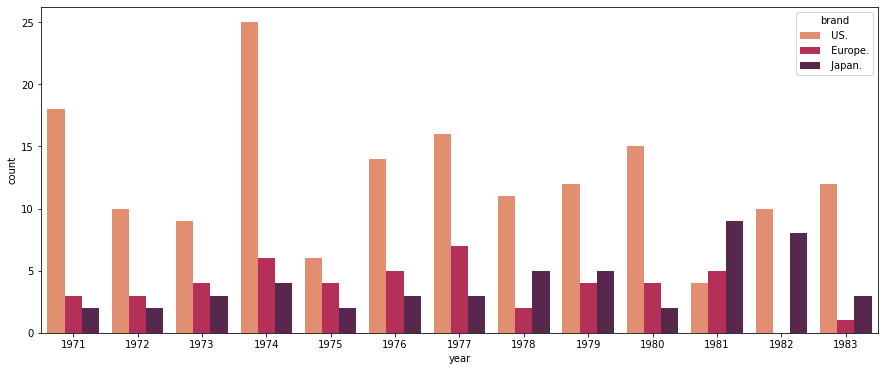

In [18]:
# Distribution of year
fig = plt.figure(figsize = (15,6))
sns.countplot(x = 'year', data = cars, hue = 'brand', palette = 'rocket_r')

Majority of cars are of US brands except for year 1981 where majority of cars are Japan brand.

Europe Brand cars remain low in number throughout the data and go as low as 0 for year 1982 


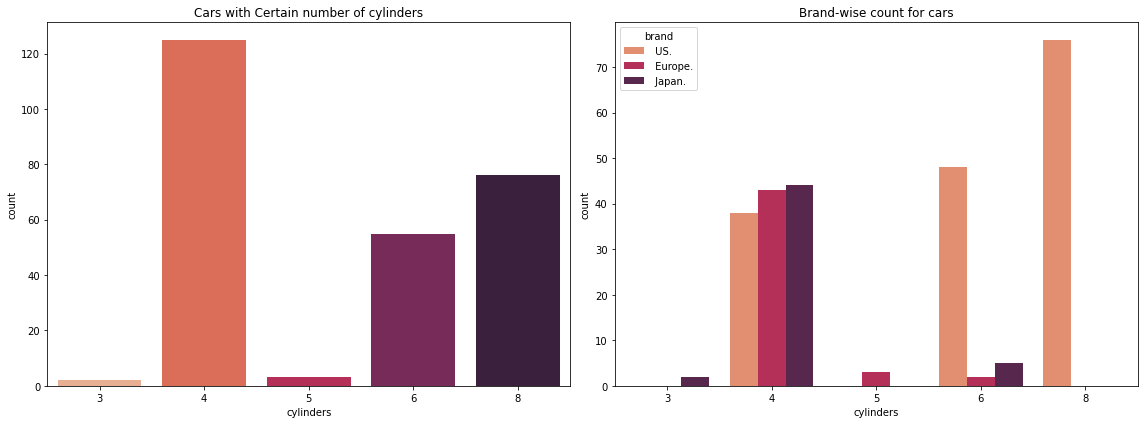

In [19]:
# count plot for cars with certain numbers of cylinders
fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('Cars with Certain number of cylinders')
sns.countplot(x='cylinders', data=cars, palette = 'rocket_r', ax = axs[0])
axs[1].set_title('Brand-wise count for cars')
sns.countplot(x='cylinders', hue='brand', data=cars, palette = 'rocket_r', ax = axs[1])
plt.tight_layout()

Majority of cars have 4 cylinders followed by 8 and 6 cylinders. Very few cars have 3 or 5 cylinders. 

Only US brand cars have 8 cylinders. There are no US brand cars with 3 or 5 cylinders.
Majority of cars in 6 cylinder category are US brand

There are only Europe brand cars in 5 cylinder category and only Japanbrand cars in 3 cylinder category.


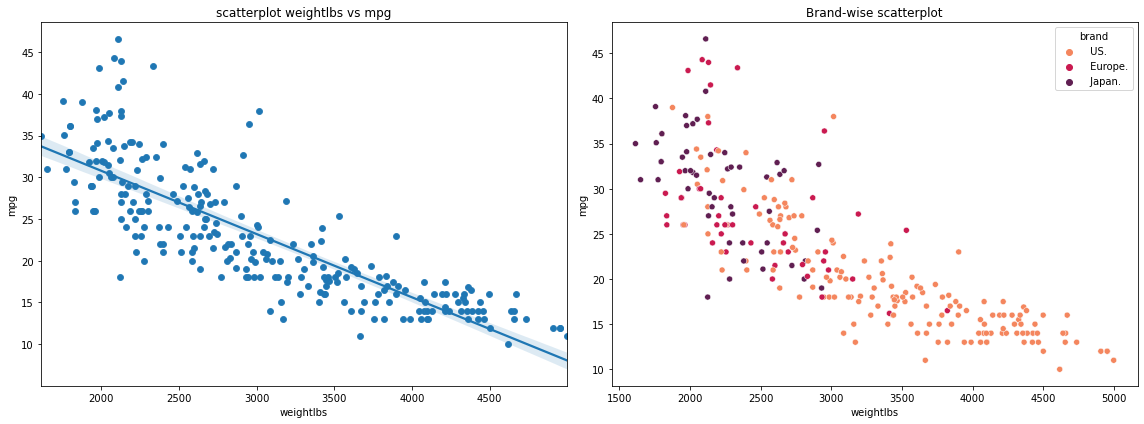

In [20]:
# scatterplot between Weightlbs and Milage mpg
fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('scatterplot weightlbs vs mpg')
sns.scatterplot(x='weightlbs', y = 'mpg', data=cars, palette = 'rocket_r', ax = axs[0])
sns.regplot(x='weightlbs', y = 'mpg', data=cars,  ax = axs[0])
axs[1].set_title('Brand-wise scatterplot')
sns.scatterplot(x='weightlbs', y = 'mpg', data=cars, hue = 'brand', palette = 'rocket_r', ax = axs[1])
plt.tight_layout()

So milage and weight have negative linear relationship. Most of the Japan and Europe brand cars are light to moderate weighted and offer moderate to good milage. whereas most of Us brand cars are heavy weighted with poor milage.  

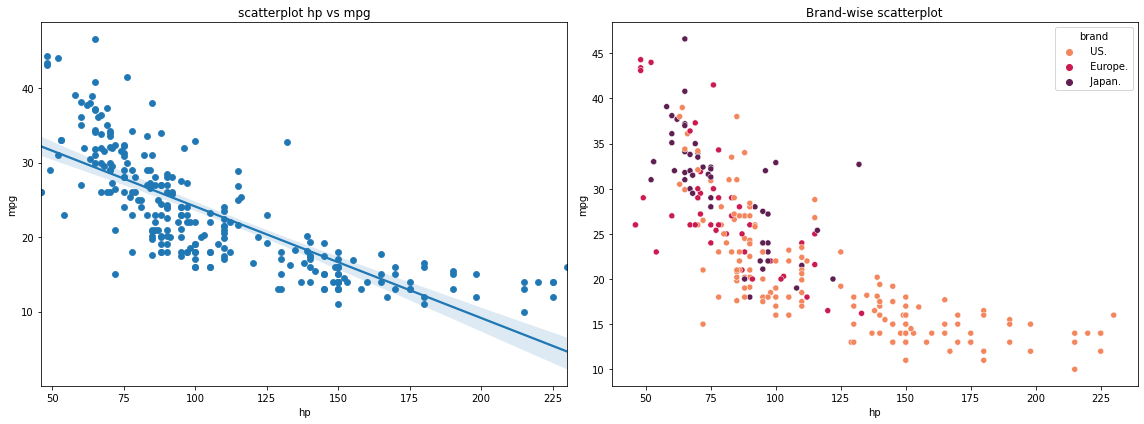

In [21]:
# scatterplot between hp and Milage mpg
fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('scatterplot hp vs mpg')
sns.scatterplot(x='hp', y = 'mpg', data=cars, palette = 'rocket_r', ax = axs[0])
sns.regplot(x='hp', y = 'mpg', data=cars,  ax = axs[0])
axs[1].set_title('Brand-wise scatterplot')
sns.scatterplot(x='hp', y = 'mpg', data=cars, hue = 'brand', palette = 'rocket_r', ax = axs[1])
plt.tight_layout()

So milage and hp have negative linear relationship. Most of the Japan and Europe brand cars low to moderate hp and offer moderate to good milage. whereas most of Us brand cars have high hp with poor milage.  

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

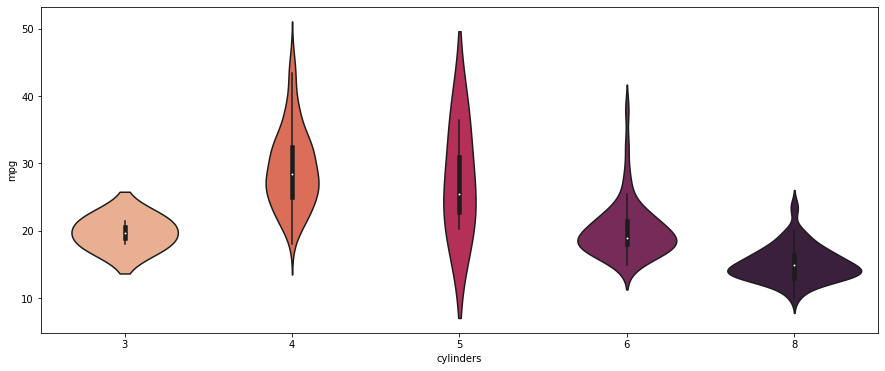

In [22]:
# violin plot for cylinders vs milage
fig = plt.figure(figsize = (15,6))
sns.violinplot(x = 'cylinders', y = 'mpg', data = cars, palette = 'rocket_r')

Normal distribution appears in cars with 3 or 8 cylinders.

Cars with 4 or 5 cylinders have good milage which decreases as cylinders are increased.


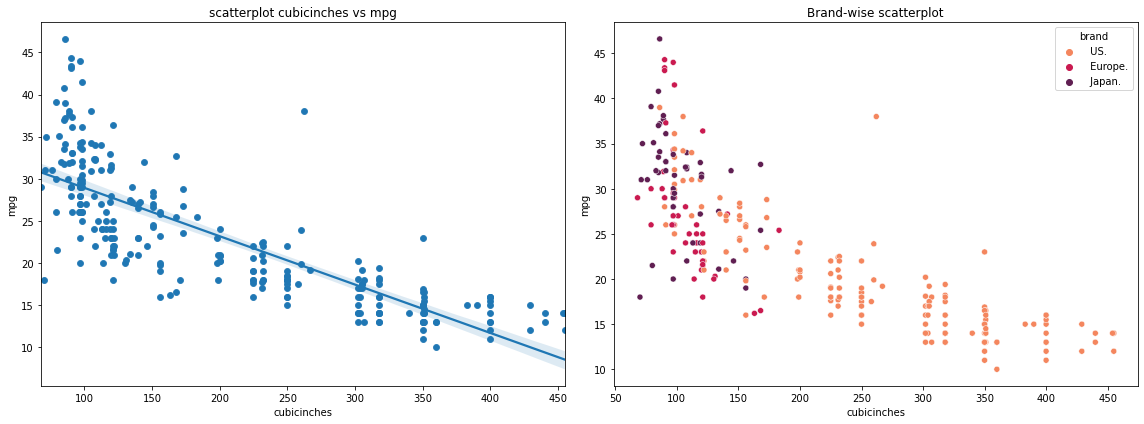

In [23]:
# scatterplot between cubicinches and Milage mpg
fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('scatterplot cubicinches vs mpg')
sns.scatterplot(x='cubicinches', y = 'mpg', data=cars, palette = 'rocket_r', ax = axs[0])
sns.regplot(x='cubicinches', y = 'mpg', data=cars,  ax = axs[0])
axs[1].set_title('Brand-wise scatterplot')
sns.scatterplot(x='cubicinches', y = 'mpg', data=cars, hue = 'brand', palette = 'rocket_r', ax = axs[1])
plt.tight_layout()

Milage decreases as cubicinches increases. US brand cars have greater cubicinches and hence less milage.  Japan and europe brand cars have low to moderate cubic inches and hence ,moderateto high milage

<AxesSubplot:xlabel='cylinders', ylabel='time-to-60'>

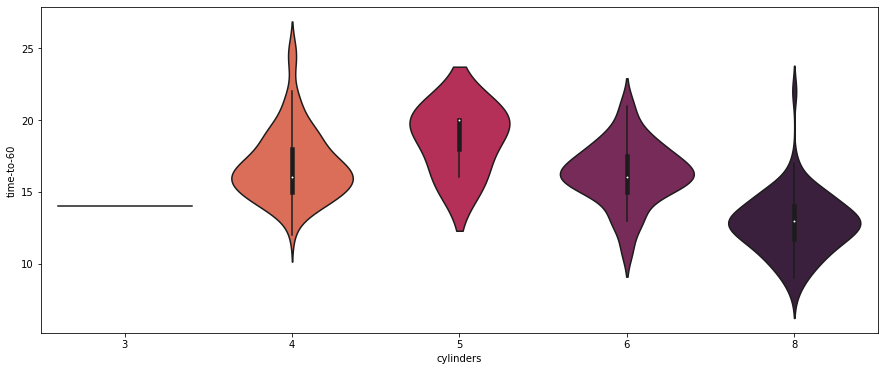

In [24]:
# violin plot for cylinders vs time to 60
fig = plt.figure(figsize = (15,6))
sns.violinplot(x = 'cylinders', y = 'time-to-60', data = cars, palette = 'rocket_r')

data is normally distributed for 6 and 8 cylinders. as number of cylinders increase, time-to-60 decreases.

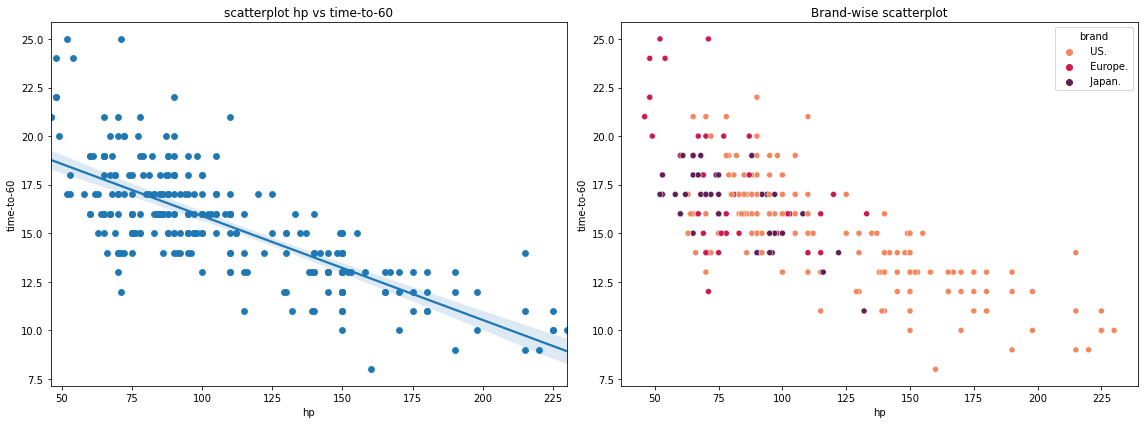

In [25]:
# scatterplot between hp and time-to-60
fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('scatterplot hp vs time-to-60')
sns.scatterplot(x='hp', y = 'time-to-60', data=cars, palette = 'rocket_r', ax = axs[0])
sns.regplot(x='hp', y = 'time-to-60', data=cars,  ax = axs[0])
axs[1].set_title('Brand-wise scatterplot')
sns.scatterplot(x='hp', y = 'time-to-60', data=cars, hue = 'brand', palette = 'rocket_r', ax = axs[1])
plt.tight_layout()

time-to-60 decreases when hp is increased. Japan and Europe brand cars have low hp and higher time-to-60. US brand cars have low time-to-60 with higher values of hp.

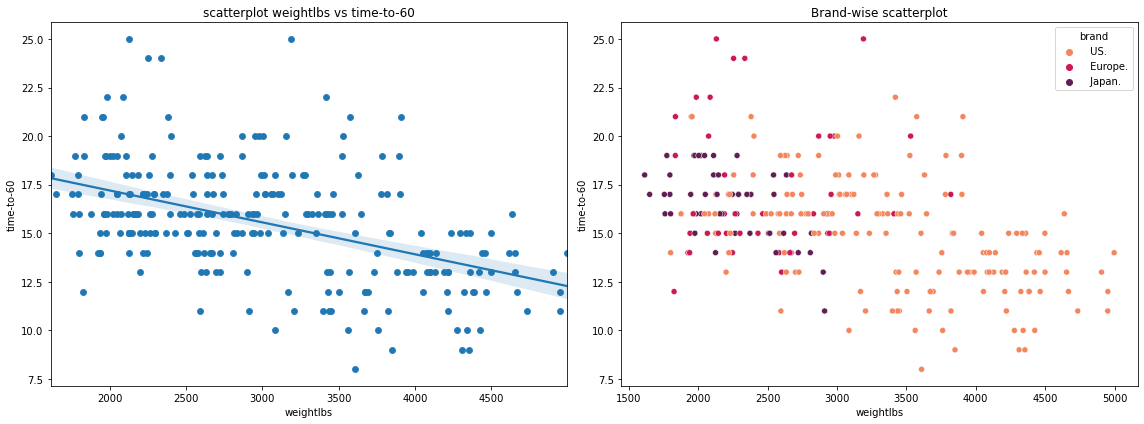

In [26]:
# scatterplot between weightlbs and time-to-60
fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('scatterplot weightlbs vs time-to-60')
sns.scatterplot(x='weightlbs', y = 'time-to-60', data=cars, palette = 'rocket_r', ax = axs[0])
sns.regplot(x='weightlbs', y = 'time-to-60', data=cars,  ax = axs[0])
axs[1].set_title('Brand-wise scatterplot')
sns.scatterplot(x='weightlbs', y = 'time-to-60', data=cars, hue = 'brand', palette = 'rocket_r', ax = axs[1])
plt.tight_layout()

The data appears more scattered and despite heavier weight US brand cars have  lesser time-to-60.

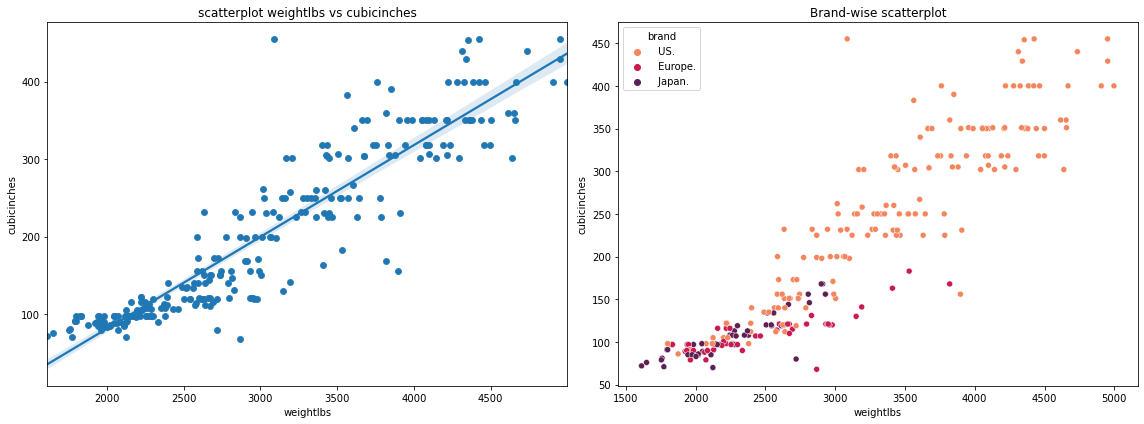

In [27]:
# scatterplot between weightlbs and cubicinches
fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('scatterplot weightlbs vs cubicinches')
sns.scatterplot(x='weightlbs', y = 'cubicinches', data=cars, palette = 'rocket_r', ax = axs[0])
sns.regplot(x='weightlbs', y = 'cubicinches', data=cars,  ax = axs[0])
axs[1].set_title('Brand-wise scatterplot')
sns.scatterplot(x='weightlbs', y = 'cubicinches', data=cars, hue = 'brand', palette = 'rocket_r', ax = axs[1])
plt.tight_layout()

It is obvious weight increases with cubicinches. US brands have higher cubicinches and higher weight. Japan and Europe brand cars have lower cubicinches and  low to moderate weight.

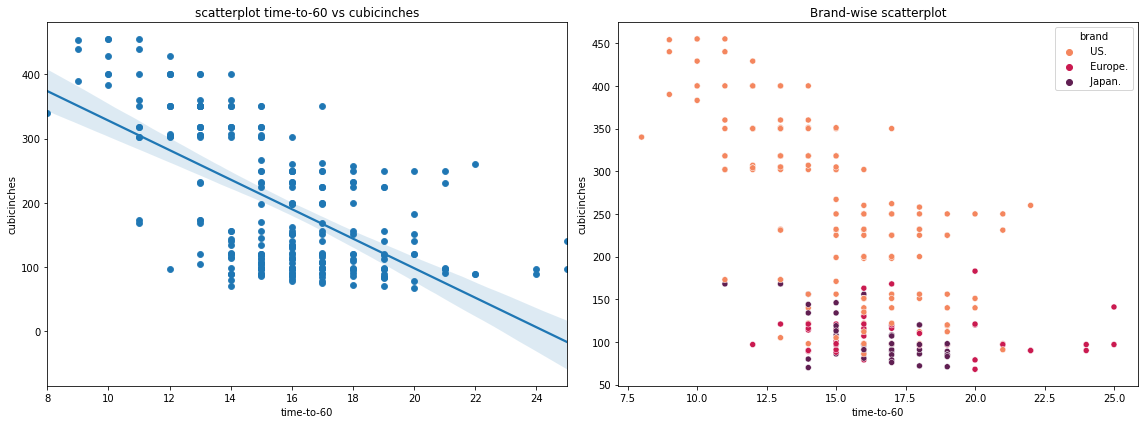

In [28]:
# scatterplot between time-to-60 and cubicinches
fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('scatterplot time-to-60 vs cubicinches')
sns.scatterplot(x='time-to-60', y = 'cubicinches', data=cars, palette = 'rocket_r', ax = axs[0])
sns.regplot(x='time-to-60', y = 'cubicinches', data=cars,  ax = axs[0])
axs[1].set_title('Brand-wise scatterplot')
sns.scatterplot(x='time-to-60', y = 'cubicinches', data=cars, hue = 'brand', palette = 'rocket_r', ax = axs[1])
plt.tight_layout()

It appears cars with smaller cubicinches take high time-to-60. Majority of US cars are medium to high in cubicinches whereas majority of Japan and Europe brand cars have low cubicinches. 

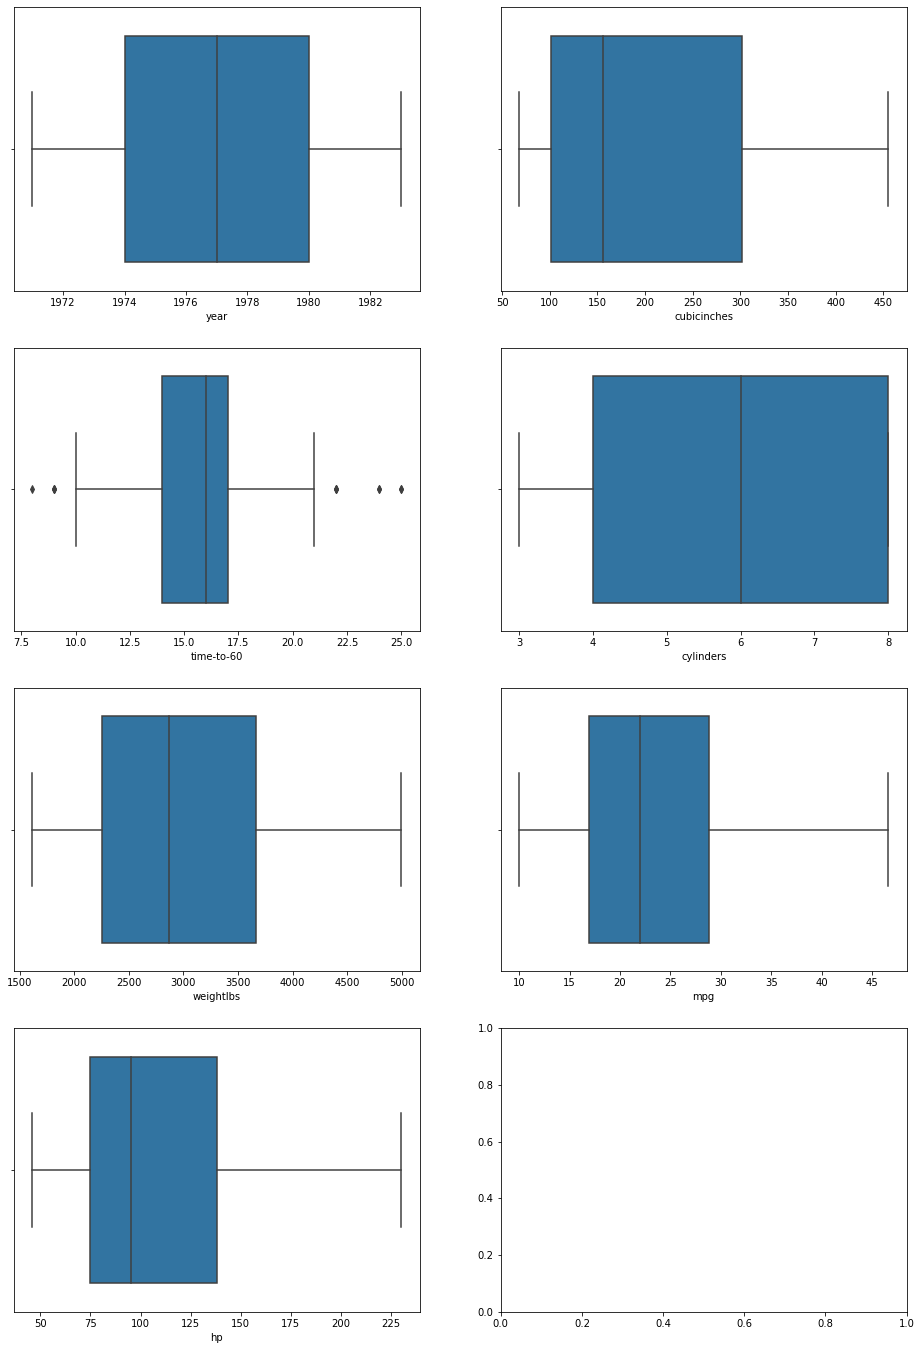

In [29]:
# check for outliers
col = [x for x in cars.columns if x not in ['brand'] ]
fig, axs = plt.subplots(4,2,figsize = (16,24))
for i in range(2):
    for j in range(4):
        try:
            sns.boxplot(cars[col[-1]], ax = axs[j][i])
            col.pop()
        except IndexError:
            pass

# Preparing data for applying clustering model

In [30]:
# Applying one hot encoding on brand
final_cars = pd.get_dummies(cars, drop_first = False)
final_cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand_ Europe.,brand_ Japan.,brand_ US.
0,14.0,8,350.0,165,4209.0,12,1972,0,0,1
1,31.9,4,89.0,71,1925.0,14,1980,1,0,0
2,17.0,8,302.0,140,3449.0,11,1971,0,0,1
3,15.0,8,400.0,150,3761.0,10,1971,0,0,1
4,30.5,4,98.0,63,2051.0,17,1978,0,0,1


In [31]:
#Scaling the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = list(final_cars.columns)
final_cars[cols] = scaler.fit_transform(final_cars[cols])
final_cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand_ Europe.,brand_ Japan.,brand_ US.
0,0.109290,1.0,0.728682,0.646739,0.767139,0.235294,0.083333,0.0,0.0,1.0
1,0.598361,0.2,0.054264,0.135870,0.092199,0.352941,0.750000,1.0,0.0,0.0
2,0.191257,1.0,0.604651,0.510870,0.542553,0.176471,0.000000,0.0,0.0,1.0
3,0.136612,1.0,0.857881,0.565217,0.634752,0.117647,0.000000,0.0,0.0,1.0
4,0.560109,0.2,0.077519,0.092391,0.129433,0.529412,0.583333,0.0,0.0,1.0


# Making Clustering Model

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)  # default kmeans++
kmeans.fit(final_cars)

KMeans(n_clusters=2, random_state=0)

In [33]:
kmeans.cluster_centers_

array([[ 5.16503836e-01,  2.30303030e-01,  9.90525409e-02,
         1.82751427e-01,  2.13298768e-01,  5.16339869e-01,
         5.25252525e-01,  4.84848485e-01,  5.15151515e-01,
         5.55111512e-16],
       [ 2.62986575e-01,  6.93827160e-01,  4.91386736e-01,
         4.16834407e-01,  5.33899542e-01,  3.99782135e-01,
         4.60390947e-01, -5.55111512e-16,  3.88578059e-16,
         1.00000000e+00]])

In [34]:
kmeans.inertia_ # here we have a high inertia where low inertia is preferred. 

136.26923542535204

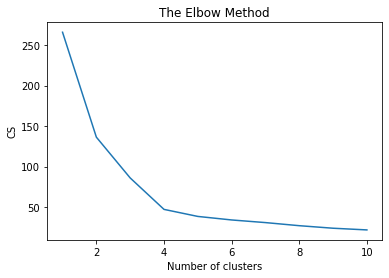

In [35]:
# using Elbow method to find appropriate number of clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(final_cars)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [36]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(final_cars)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(final_cars, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4801648451559408
For n_clusters=3, the silhouette score is 0.5675001487920346
For n_clusters=4, the silhouette score is 0.5379660207788709
For n_clusters=5, the silhouette score is 0.5016569637296355
For n_clusters=6, the silhouette score is 0.4646555571356464
For n_clusters=7, the silhouette score is 0.41233965838443887
For n_clusters=8, the silhouette score is 0.3459452350424418


So model with 4 clusters is appropraite. It has low WCSS and high Silhouette score.

In [37]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(final_cars)

KMeans(n_clusters=4, random_state=0)

In [38]:
cars['cluster'] = kmeans.labels_

In [39]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,cluster
0,14.0,8,350.0,165,4209.0,12,1972,US.,3
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,0
2,17.0,8,302.0,140,3449.0,11,1971,US.,3
3,15.0,8,400.0,150,3761.0,10,1971,US.,3
4,30.5,4,98.0,63,2051.0,17,1978,US.,1


<AxesSubplot:xlabel='cluster', ylabel='brand'>

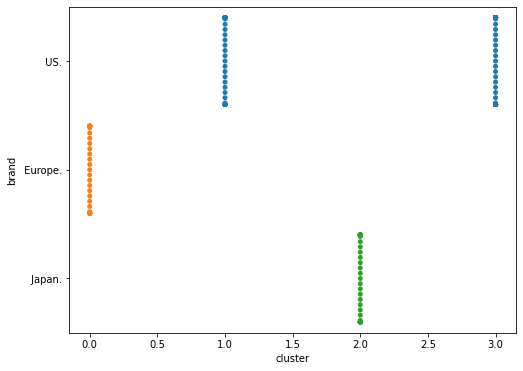

In [40]:
fig = plt.figure(figsize = (8,6))
sns.swarmplot(cars.cluster, cars.brand)

<AxesSubplot:xlabel='cluster', ylabel='cylinders'>

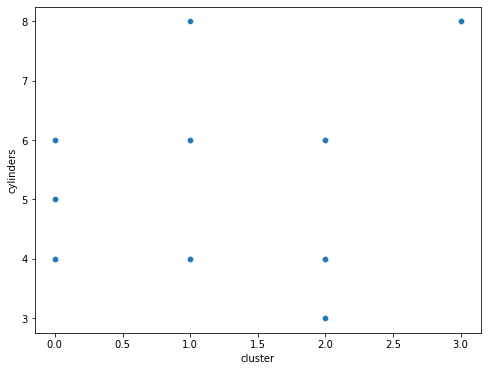

In [41]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(cars.cluster, cars.cylinders)

<AxesSubplot:xlabel='cluster', ylabel='cubicinches'>

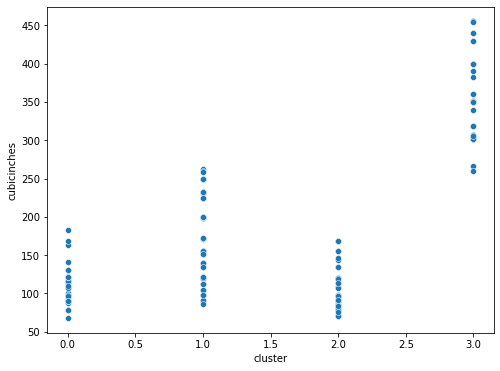

In [42]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(cars.cluster, cars.cubicinches)

<AxesSubplot:xlabel='cluster', ylabel='hp'>

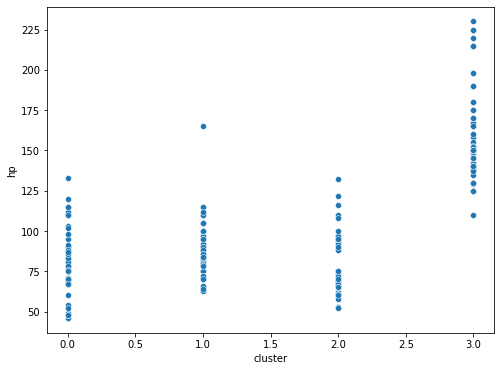

In [43]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(cars.cluster, cars.hp)

<AxesSubplot:xlabel='cluster', ylabel='mpg'>

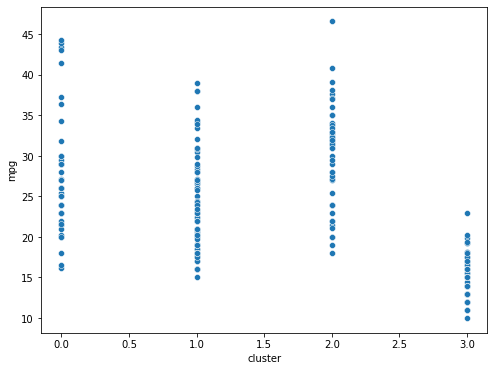

In [44]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(cars.cluster, cars.mpg)

<AxesSubplot:xlabel='cluster', ylabel='weightlbs'>

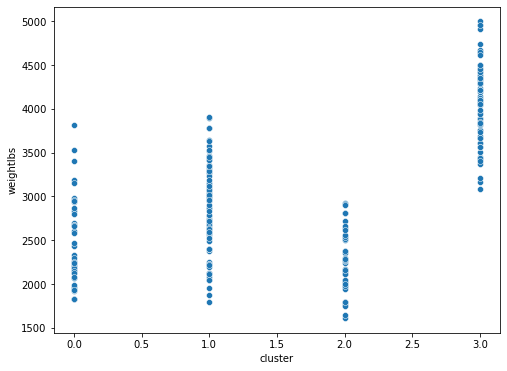

In [45]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(cars.cluster, cars.weightlbs)

<AxesSubplot:xlabel='cluster', ylabel='time-to-60'>

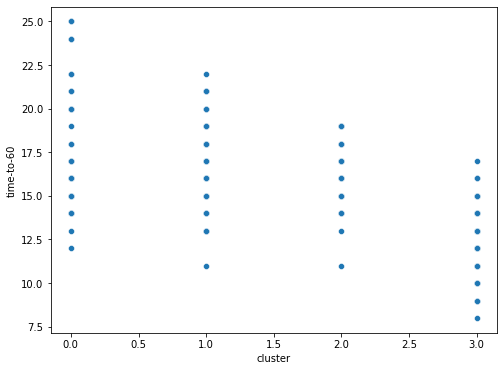

In [46]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(cars.cluster, cars['time-to-60'])

<AxesSubplot:xlabel='cluster', ylabel='year'>

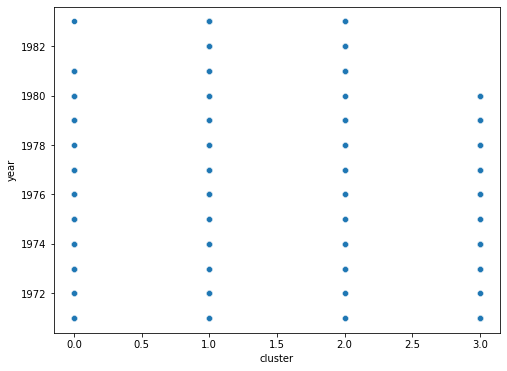

In [47]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(cars.cluster, cars['year'])

In [48]:
#lets classify data into categories 
# moderate if data is in IQR
# low if lesser than lower bound of IQR
# High if higher than upper bound of IQR
# Classifying milage
upper = np.quantile(cars['mpg'], 0.75)
lower = np.quantile(cars['mpg'], 0.25)
low = []
high = []
mid = []
for i in range(len(cars.mpg)):
    if cars.mpg[i] < lower:
        low.append(cars.mpg[i])
    elif cars.mpg[i] > upper:
        high.append(cars.mpg[i])
    else:
        mid.append(cars.mpg[i])
cars.mpg.replace(low, 'low', inplace = True)
cars.mpg.replace(mid, 'mid', inplace = True)
cars.mpg.replace(high, 'high', inplace = True)


In [49]:
#classify cubic inches
upper = np.quantile(cars['cubicinches'], 0.75)
lower = np.quantile(cars['cubicinches'], 0.25)
low = []
high = []
mid = []
for i in range(len(cars.cubicinches)):
    if cars.cubicinches[i] < lower:
        low.append(cars.cubicinches[i])
    elif cars.cubicinches[i] > upper:
        high.append(cars.cubicinches[i])
    else:
        mid.append(cars.cubicinches[i])
cars.cubicinches.replace(low, 'small', inplace = True)
cars.cubicinches.replace(mid, 'midium', inplace = True)
cars.cubicinches.replace(high, 'big', inplace = True)

In [50]:
#classify hp
upper = np.quantile(cars['hp'], 0.75)
lower = np.quantile(cars['hp'], 0.25)
low = []
high = []
mid = []
for i in range(len(cars.hp)):
    if cars.hp[i] < lower:
        low.append(cars.hp[i])
    elif cars.hp[i] > upper:
        high.append(cars.hp[i])
    else:
        mid.append(cars.hp[i])
cars.hp.replace(low, 'low', inplace = True)
cars.hp.replace(mid, 'mid', inplace = True)
cars.hp.replace(high, 'high', inplace = True)


In [51]:
# classify weightlbs
upper = np.quantile(cars['weightlbs'], 0.75)
lower = np.quantile(cars['weightlbs'], 0.25)
low = []
high = []
mid = []
for i in range(len(cars.weightlbs)):
    if cars.weightlbs[i] < lower:
        low.append(cars.weightlbs[i])
    elif cars.weightlbs[i] > upper:
        high.append(cars.weightlbs[i])
    else:
        mid.append(cars.weightlbs[i])
cars.weightlbs.replace(low, 'light', inplace = True)
cars.weightlbs.replace(mid, 'midium', inplace = True)
cars.weightlbs.replace(high, 'heavy', inplace = True)


In [52]:
# classify time-to-60
upper = np.quantile(cars['time-to-60'], 0.75)
lower = np.quantile(cars['time-to-60'], 0.25)
low = []
high = []
mid = []
for i in range(len(cars['time-to-60'])):
    if cars['time-to-60'][i] < lower:
        low.append(cars['time-to-60'][i])
    elif cars['time-to-60'][i] > upper:
        high.append(cars['time-to-60'][i])
    else:
        mid.append(cars['time-to-60'][i])
cars['time-to-60'].replace(low, 'fast', inplace = True)
cars['time-to-60'].replace(mid, 'moderate', inplace = True)
cars['time-to-60'].replace(high, 'slow', inplace = True)


In [53]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,cluster
0,low,8,big,high,heavy,fast,1972,US.,3
1,high,4,small,low,light,moderate,1980,Europe.,0
2,mid,8,midium,high,midium,fast,1971,US.,3
3,low,8,big,high,heavy,fast,1971,US.,3
4,high,4,small,low,light,moderate,1978,US.,1


<AxesSubplot:xlabel='cluster', ylabel='cubicinches'>

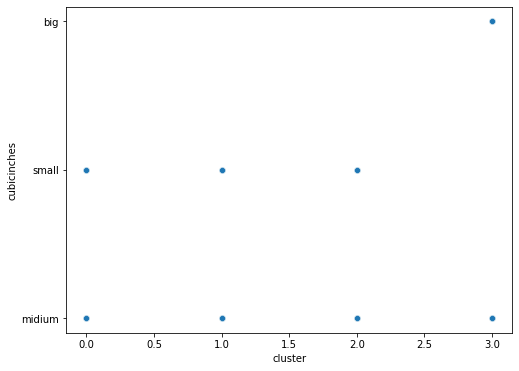

In [54]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(cars.cluster, cars.cubicinches)

<AxesSubplot:xlabel='cluster', ylabel='mpg'>

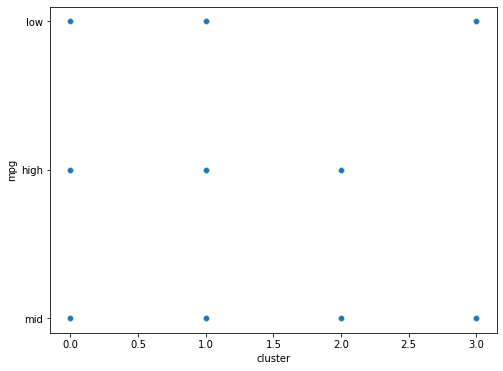

In [55]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(cars.cluster, cars.mpg)

<AxesSubplot:xlabel='cluster', ylabel='weightlbs'>

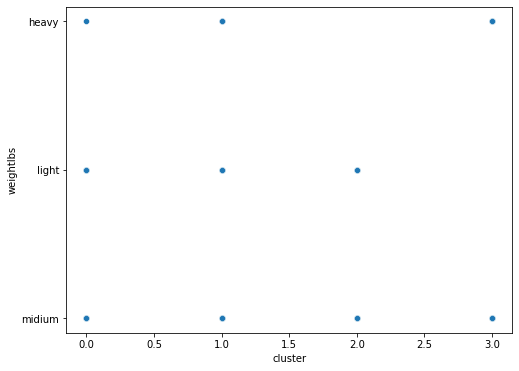

In [56]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(cars.cluster, cars.weightlbs)

<AxesSubplot:xlabel='cluster', ylabel='hp'>

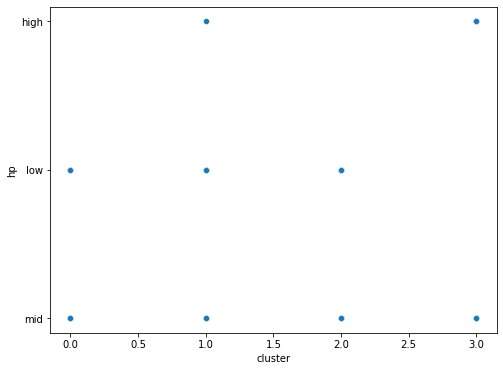

In [57]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(cars.cluster, cars.hp)

<AxesSubplot:xlabel='cluster', ylabel='time-to-60'>

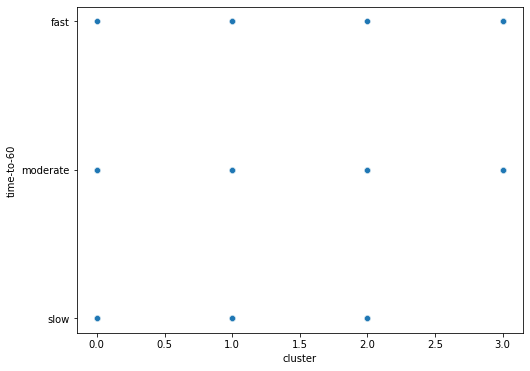

In [58]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(cars.cluster, cars['time-to-60'])

# Cluster Report

Here are the details about various clusters:

Cluster 0 : Brand - US, Milage (mpg) - low or mid, Horsepower (hp) - mid to high, Accleartion (Time to 60) - moderate or fast, Engine Displacement (cubicinches) - medium or big, Weight - medium or heavy, Year of Launch - 1971 to 1980, Cylinders - 8
    
Cluster 1 : Brand - Japan, Milage (mpg) - mid or high, Horsepower (hp) - low to mid, Accleartion (Time to 60) - slow, moderate or fast, Engine Displacement (cubicinches) - small or medium, Weight - medium or light, Year of Launch - 1971 to 1983, Cylinders - [3,4,6]

Cluster 2 : Brand - Europe, Milage (mpg) - low, mid or high, Horsepower (hp) - low to mid, Accleartion (Time to 60) - slow, moderate or fast, Engine Displacement (cubicinches) - small or medium, Weight - Light, medium or heavy, Year of Launch - 1971 to 1983 except 1982, Cylinders - [4,5,6]

Cluster 3 : Brand - US, Milage (mpg) -  low, mid or high, Horsepower (hp) - low, mid or high, Accleartion (Time to 60) - slow, moderate or fast, Engine Displacement (cubicinches) - small or medium, Weight - Light, medium or heavy, Year of Launch - 1971 to 1983, Cylinders - [4,6,8]
    